In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display matplotlib plots directly in the notebook, instead of in separate windows.
%matplotlib inline 

# set max command
pd.set_option("display.max_columns", 200)

### Generate Markdown

In [298]:
%run ../helper/generate_markdown.ipynb import generate_markdown_text

generate_markdown_text('iii.Subplot occupations by funny ratings rate and funny ratins count.')

'iii. [Subplot occupations by funny ratings rate and funny ratins count.](#-iii.Subplot-occupations-by-funny-ratings-rate-and-funny-ratins-count.)'

# TED Talks Dataset Exploration

1. [Observe the data.](#-1.Observe-the-data.)
2. [Determine which discussions generate the highest level of online engagement.](#-2.Determine-which-discussions-generate-the-highest-level-of-online-engagement.)
3. [Visualize the distribution of comments.](#-3.Visualize-the-distribution-of-comments.)
4. [Plot the number of talks that took place each year.](#-4.Plot-the-number-of-talks-that-took-place-each-year.)
5. [Unpack the ratings data.](#-5.Unpack-the-ratings-data.)
    - i. [Calculate the total number of ratings per talk.](#-i.Calculate-the-total-number-of-ratings-per-talk.)
        - I. [Using regex.](#-I.Using-regex.)
        - II. [Using custom function.](#-II.Using-custom-function.)
        - III. [Using lambda.](#-III.Using-lambda.)
        - IV. [Using pd.DataFrame().](#-IV.Using-pd.DataFrame().)
    - ii. [Calculate the percentage of negative ratings.](#-ii.Calculate-the-percentage-of-negative-ratings.)
    - iii. [Calculate the average number of ratings each talk received per day since it was published.](#-iii.Calculate-the-average-number-of-ratings-each-talk-received-per-day-since-it-was-published.)
6. [Analyze the occupations delivering funniest talks.](#-6.Analyze-the-occupations-delivering-funniest-talks.)
    - i. [Plot the top 20 occupations.](#-i.Plot-the-top-20-occupations.)
    - ii. [Calculate funny ratings rate.](#-ii.Calculate-funny-ratings-rate.)
    - iii. [Subplot occupations by funny ratings rate and funny ratins count.](#-iii.Subplot-occupations-by-funny-ratings-rate-and-funny-ratins-count.)


### 1.Observe the data.

In [299]:
df = pd.read_csv("../data/ted_main.csv")

df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [300]:
df.shape

(2550, 17)

In [301]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [302]:
# check null values
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [303]:
# review the rows with missing speaker_occupation column values 
df.loc[df.speaker_occupation.isnull() == True ]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 2.Determine which discussions generate the highest level of online engagement.

In [304]:
# Explore the `comments` column.
df.sort_values('comments', ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764


In [305]:
# Since older talks are naturally likely to have higher comment count, 
# calculate the `comments_per_view` value.
df['comments_per_view'] = df.comments / df.views

In [306]:
df.sort_values('comments_per_view', ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360


In [307]:
df.sort_values('comments_per_view', ascending=False)\
    [['title', 'comments', 'views', 'comments_per_view']].head(10)

,title,comments,views,comments_per_view
744,The case for same-sex marriage,649,292395,0.002220
803,E-voting without fraud,834,543551,0.001534
96,Militant atheism,6404,4374792,0.001464
694,Inside a school for suicide bombers,1502,1057238,0.001421
954,Taking imagination seriously,2492,1832930,0.001360
840,On reading the Koran,2374,1847256,0.001285
876,Curating humanity's heritage,555,439180,0.001264
1787,How do you explain consciousness?,2673,2162764,0.001236
661,The danger of science denial,2272,1838628,0.001236
561,Dance to change the world,595,481834,0.001235


In [308]:
# Make it more interperetable by inverting the calculation.
df['views_per_comment'] = df.views / df.comments

In [309]:
df.sort_values('views_per_comment', ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
2534,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,1504814438,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...","[{'id': 2511, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174,0.000003,323087.000000
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004,279680.000000
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286


In [310]:
df.sort_values('views_per_comment', ascending=False)\
    [['title', 'comments', 'views', 'views_per_comment']]\
        .head(10)

,title,comments,views,views_per_comment
2534,What it feels like to see Earth from space,2,646174,323087.000000
2501,The stories behind The New Yorker's iconic covers,3,839040,279680.000000
2542,Living sculptures that stand for history's truths,3,542088,180696.000000
2528,How your pictures can help reclaim lost history,3,539207,179735.666667
2494,A simple new blood test that can catch cancer ...,7,1005506,143643.714286
2313,"""St. James Infirmary Blues""",6,820295,136715.833333
2114,This is what happens when you reply to spam email,150,20475972,136506.480000
2407,"""Turceasca""",5,640734,128146.800000
2392,"Smelfies, and other experiments in synthetic b...",6,760537,126756.166667
2273,The agony of trying to unsubscribe,46,5711833,124170.282609


[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 3.Visualize the distribution of comments.

- `Line plots`: 
    - Best used to visualize trends in data over time or across a continuous variable. 
    - Work by plotting the value of the variable on the y-axis and the corresponding time or other continuous variable on the x-axis, resulting in a line that connects the data points. 
    - Are particularly useful for identifying patterns such as trends, seasonal variations, and cyclical fluctuations.

<AxesSubplot:>

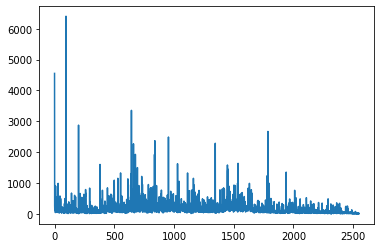

In [311]:
# line plot would not work for this purpose
df.comments.plot()

- `Histograms`: 
    - Best used to visualize the distribution of a single variable, particularly when the variable is continuous or can be grouped into intervals. 
    - Work by dividing the range of the variable into a set of bins and counting the number of observations that fall into each bin. The resulting chart shows the frequency of values in each bin, allowing you to quickly see the shape and spread of the data. 
    - Are particularly useful for identifying patterns in the data such as skewness, multimodality, and outliers.

<AxesSubplot:ylabel='Frequency'>

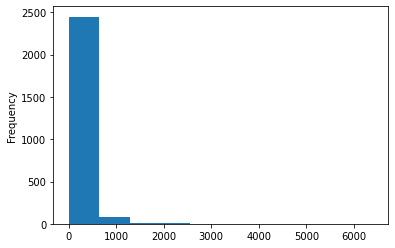

In [312]:
df.comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

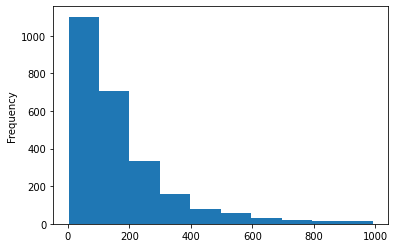

In [313]:
# Filter the comments to make the plot more informative.
df.query('comments <1000').comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

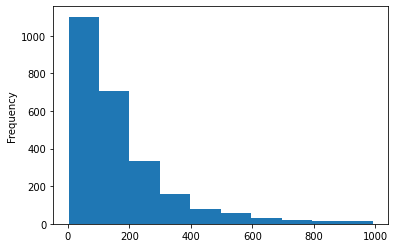

In [314]:
# alternative filtering method using loc accessor
df.loc[df.comments < 1000, 'comments'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

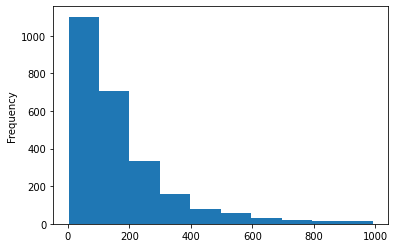

In [315]:
# alternative filtering method
df[df.comments < 1000]['comments'].plot(kind='hist')

In [316]:
# Increase the number of bins to see more details
df.query('comments >= 1000').shape

(32, 19)

<AxesSubplot:ylabel='Frequency'>

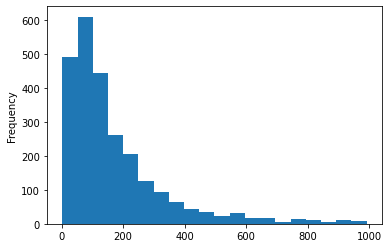

In [317]:
# Increase the number of bins to see more details
df.query('comments < 1000').comments.plot(kind='hist',
                                          bins=20)

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 4.Plot the number of talks that took place each year.

In [318]:
# event column does not have consistent values for years.
df.event.sample(10)

45              TED2005
569             EG 2008
657         TEDMED 2009
2022    TEDGlobalLondon
475             TED2009
117             TED2007
1041     TEDGlobal 2011
1124     TEDxWomen 2011
409             TED2009
2345        TEDxNewYork
Name: event, dtype: object

In [319]:
# film_date column displays the Unix timestamp of the filming.
df.film_date.sample

<bound method NDFrame.sample of 0       1140825600
1       1140825600
2       1140739200
3       1140912000
4       1140566400
           ...    
2545    1496707200
2546    1492992000
2547    1492992000
2548    1499472000
2549    1492992000
Name: film_date, Length: 2550, dtype: int64>

In [320]:
# making the Unix timestamp more human readable with to_datetime() method
pd.to_datetime(df.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

In [321]:
# Need to specify unit as 's' or 'ns'
pd.to_datetime(df.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [322]:
# save the results as 'film_datetime'
df['film_datetime'] = pd.to_datetime(df.film_date, unit='s')

In [323]:
df[['title', 'film_datetime', 'event']].sample(10)

,title,film_datetime,event
102,"""Black Men Ski""",2006-03-03,TED2006
1193,The secret life of plankton,2012-04-02,TED-Ed
539,Animating a photo-real digital face,2009-03-23,TEDxUSC
1781,Why I love a country that once betrayed me,2014-06-04,TEDxKyoto
789,The art of the eco-mindshift,2009-10-09,Business Innovation Factory
1067,How games make kids smarter,2011-06-01,TEDxKids@Brussels
2090,Why are these 32 symbols found in ancient cave...,2015-08-26,TED Fellows Retreat 2015
2106,Refugees have the right to be protected,2015-12-08,TEDGlobal>Geneva
1814,"An engineer's vision for tiny forests, everywhere",2014-03-16,TED2014
1850,How I defend the rule of law,2014-10-10,TEDGlobal 2014


In [324]:
# get the number of talks that took place each year
df.film_datetime.dt.year.value_counts().head(10)

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
Name: film_datetime, dtype: int64

<AxesSubplot:>

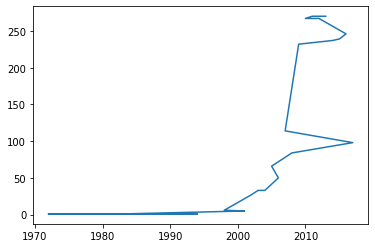

In [325]:
# plot the value counts
# the points are plotted and connected in the order given to the pandas
df.film_datetime.dt.year.value_counts().plot()

<AxesSubplot:>

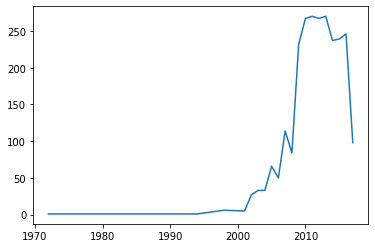

In [326]:
df.film_datetime.dt.year\
    .value_counts()\
    .sort_index()\
    .plot()

<AxesSubplot:>

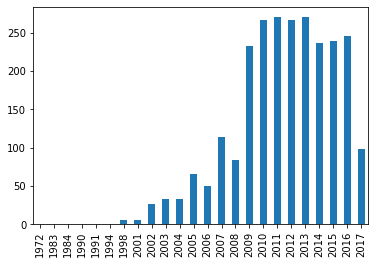

In [327]:
df.film_datetime.dt.year\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar')

In [328]:
# remember that we only have partial data for year 2017 hence the sharp drop in talk count in 2017.
df.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 5.Unpack the ratings data.

In [329]:
# ratings data consist of hashtags that users used to describe a talk 
df.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [330]:
# notice ratings compose of a list of dict wrapped in a string
df.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [331]:
# Python's built-in ast (Abstract Syntax Tree) library is one way to convert the str into a list
import ast 
output = ast.literal_eval('["a", "b", "c"]')
output

['a', 'b', 'c']

In [332]:
type(output)

list

In [333]:
# sample
ast.literal_eval(df.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [334]:
# option 1: create the function inside the notebook
import ast

def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [335]:
# option 2: import the function from a module inside the project
from ted_talks import str_to_list

df.ratings.apply(str_to_list).head()


0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [336]:
# option 3: simply use lambda expression for the simple function
df.ratings.apply(lambda x: ast.literal_eval(x)).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [337]:
# option 4: apply the function directly
df.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [338]:
# creata a column named ratings_list 
df['ratings_list'] = df.ratings.apply(lambda x: ast.literal_eval(x))

In [339]:
type(df.ratings_list[0])

list

In [340]:
# object type may include other Python data types - not just String
df.ratings_list.dtype

dtype('O')

In [341]:
df.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### i.Calculate the total number of ratings per talk.

#### I.Using regex.

In [342]:
df.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [343]:
import re 

sample_ratings_str = df.ratings[0]

count_values = [int(i) for i in re.findall(r"'count': (\d+)", sample_ratings_str)]

count_values

[19645,
 4573,
 6073,
 3253,
 387,
 242,
 7346,
 10581,
 300,
 10704,
 4439,
 1174,
 209,
 24924]

In [344]:
total_ratings_count = sum(count_values)
total_ratings_count

93850

In [345]:
ratings_list = []
for ratings in df.ratings:
    count_values = [int(i) for i in re.findall(r"'count': (\d+)", ratings)]
    total_ratings_count = sum(count_values)
    ratings_list.append(total_ratings_count)

ratings_list[0:5]

[93850, 2936, 2824, 3728, 25620]

In [346]:
df['total_ratings_count'] = ratings_list
df.total_ratings_count.head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: total_ratings_count, dtype: int64

In [347]:
# drop the column to explore other ways 
df = df.drop('total_ratings_count', axis=1)

In [348]:
# less readable one liner version
df['total_ratings_count'] = df.ratings.map(lambda x: sum(map(int, re.findall(r"'count': (\d+)", x))))


In [349]:
df.total_ratings_count.head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: total_ratings_count, dtype: int64

In [350]:
# drop the column to explore other ways 
df = df.drop('total_ratings_count', axis=1)

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### II.Using custom function.

In [351]:
for d in df.ratings_list[0]:
    print(d)

{'id': 7, 'name': 'Funny', 'count': 19645}
{'id': 1, 'name': 'Beautiful', 'count': 4573}
{'id': 9, 'name': 'Ingenious', 'count': 6073}
{'id': 3, 'name': 'Courageous', 'count': 3253}
{'id': 11, 'name': 'Longwinded', 'count': 387}
{'id': 2, 'name': 'Confusing', 'count': 242}
{'id': 8, 'name': 'Informative', 'count': 7346}
{'id': 22, 'name': 'Fascinating', 'count': 10581}
{'id': 21, 'name': 'Unconvincing', 'count': 300}
{'id': 24, 'name': 'Persuasive', 'count': 10704}
{'id': 23, 'name': 'Jaw-dropping', 'count': 4439}
{'id': 25, 'name': 'OK', 'count': 1174}
{'id': 26, 'name': 'Obnoxious', 'count': 209}
{'id': 10, 'name': 'Inspiring', 'count': 24924}


In [352]:
for d in df.ratings_list[0]:
    print(d['count'])

19645
4573
6073
3253
387
242
7346
10581
300
10704
4439
1174
209
24924


In [353]:
sum(int(d['count']) for d in df.ratings_list[0])

93850

In [354]:
# create a function
# def extract_count(dict_list):
#     return sum(int(d['count']) for d in dict_list)

In [355]:
from ted_talks import extract_count

In [356]:
extract_count(df.ratings_list[0])

93850

In [357]:
# apply the function to each series
df.ratings_list.apply(extract_count).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [358]:
df['total_ratings_count'] = df.ratings_list.apply(extract_count)

In [359]:
df.total_ratings_count.head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: total_ratings_count, dtype: int64

In [360]:
df = df.drop('total_ratings_count', axis=1)

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### III.Using lambda.

In [361]:
df.ratings_list.apply(lambda x: sum(int(d['count']) for d in x)).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [362]:
df['total_ratings_count'] = df.ratings_list.apply(lambda x: sum(int(d['count']) for d in x))

df['total_ratings_count'].head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: total_ratings_count, dtype: int64

In [363]:
df = df.drop('total_ratings_count', axis=1)

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### IV.Using pd.DataFrame().

In [364]:
pd.DataFrame(df.ratings_list[0])

,id,name,count
0,7,Funny,19645
1,1,Beautiful,4573
2,9,Ingenious,6073
3,3,Courageous,3253
4,11,Longwinded,387
5,2,Confusing,242
6,8,Informative,7346
7,22,Fascinating,10581
8,21,Unconvincing,300
9,24,Persuasive,10704


In [365]:
pd.DataFrame(df.ratings_list[0])['count']

0     19645
1      4573
2      6073
3      3253
4       387
5       242
6      7346
7     10581
8       300
9     10704
10     4439
11     1174
12      209
13    24924
Name: count, dtype: int64

In [366]:
pd.DataFrame(df.ratings_list[0])['count'].sum()

93850

In [367]:
# use lambda to apply the logic
df.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum()).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [368]:
df['total_ratings_count'] = df.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum())

df['total_ratings_count'].head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: total_ratings_count, dtype: int64

In [369]:
df.total_ratings_count.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: total_ratings_count, dtype: float64

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

### ii.Calculate the percentage of negative ratings.


In [370]:
df.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [371]:
# create a list of negative remark keys
negative_remarks = ['Longwinded', 'Unconvincing', 'Obnoxious']


In [372]:
# iterative over all the ratings dictionaries in the first ratings list
for d in df.ratings_list[0]:
    # check if the name of the rating is in the negative_remakrs list
    if d['name'] in negative_remarks:
        # print the negative remark name and count value 
        print(d['name'], d['count'], end=";")

Longwinded 387;Unconvincing 300;Obnoxious 209;

In [373]:
# Iterate over all the rows of the ratings_list column
for rating_list in df['ratings_list']:
    # Iterate over all the ratings in the rating_list
    for rating in rating_list:
        # Check if the name of the rating is in the negative_remarks list
        if rating['name'] in negative_remarks:
            # Get the corresponding count value and print it
            count = rating['count']
            print(count)
    break # break after the first dict iteration

387
300
209


In [374]:
df.ratings_list.apply(lambda x: sum(int(d['count']) for d in x if d['name'] in negative_remarks)).head()

0    896
1    502
2    324
3    124
4    238
Name: ratings_list, dtype: int64

In [375]:
# negative remarks percentage 
# not readable 
(df.ratings_list.apply(lambda x: sum(int(d['count']) for d in x if d['name'] in negative_remarks))\
    /
    df.total_ratings_count).head()

0    0.009547
1    0.170981
2    0.114731
3    0.033262
4    0.009290
dtype: float64

In [376]:
# # create a function
# def extract_negative_remark_count(dict_list: dict) -> int:
#     remarks = ['Longwinded', 'Unconvincing', 'Obnoxious']
#     total_count = 0
#     for d in dict_list:
#         if d['name'] in remarks:
#             count = int(d['count'])
#             total_count += count 
#     return total_count

from ted_talks import extract_negative_remark_count
    

In [377]:
# test the function
extract_negative_remark_count(df.ratings_list[0])

896

In [378]:
df.ratings_list.apply(extract_negative_remark_count).head()

0    896
1    502
2    324
3    124
4    238
Name: ratings_list, dtype: int64

In [379]:
df['negative_comment_count'] = df.ratings_list.apply(extract_negative_remark_count)

df.negative_comment_count.head()

0    896
1    502
2    324
3    124
4    238
Name: negative_comment_count, dtype: int64

In [380]:
df[['title', 'views', 'comments_per_view', 'total_ratings_count', 'negative_comment_count']] \
    .sort_values('negative_comment_count', ascending=False) \
    .head()

,title,views,comments_per_view,total_ratings_count,negative_comment_count
494,I believe we evolved from aquatic apes,1038576,0.000598,6680,3246
481,17 words of architectural inspiration,784642,0.000539,3779,2693
2314,Enough with the fear of fat,1594248,0.000204,4153,2049
677,How great leaders inspire action,34309432,0.000056,56779,1614
9,A life of purpose,3095993,0.000291,8327,1515


In [381]:
# find the count of talks with no negative comments
df.query('negative_comment_count == 0.0').count()

comments                  17
description               17
duration                  17
event                     17
film_date                 17
languages                 17
main_speaker              17
name                      17
num_speaker               17
published_date            17
ratings                   17
related_talks             17
speaker_occupation        17
tags                      17
title                     17
url                       17
views                     17
comments_per_view         17
views_per_comment         17
film_datetime             17
ratings_list              17
total_ratings_count       17
negative_comment_count    17
dtype: int64

In [382]:
# Inspect a sample entry to find out 
# if the negative_comment_count is 0 because of missing negative remarks.
for dict_list in df.query('negative_comment_count == 0.0')['ratings_list']:
    print(dict_list)
    break
    

[{'id': 8, 'name': 'Informative', 'count': 209}, {'id': 9, 'name': 'Ingenious', 'count': 105}, {'id': 22, 'name': 'Fascinating', 'count': 168}, {'id': 1, 'name': 'Beautiful', 'count': 43}, {'id': 10, 'name': 'Inspiring', 'count': 111}, {'id': 23, 'name': 'Jaw-dropping', 'count': 13}, {'id': 25, 'name': 'OK', 'count': 38}, {'id': 24, 'name': 'Persuasive', 'count': 24}, {'id': 7, 'name': 'Funny', 'count': 18}, {'id': 2, 'name': 'Confusing', 'count': 1}, {'id': 3, 'name': 'Courageous', 'count': 8}, {'id': 11, 'name': 'Longwinded', 'count': 0}, {'id': 21, 'name': 'Unconvincing', 'count': 0}, {'id': 26, 'name': 'Obnoxious', 'count': 0}]


In [383]:
# percentage negative comments 
((df.negative_comment_count / df.total_ratings_count) * 100).sort_values(ascending=False).head()

481     71.262239
1704    55.412054
2314    49.337828
494     48.592814
113     48.148148
dtype: float64

In [384]:
df.query('negative_comment_count / total_ratings_count >= 0.50')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment,film_datetime,ratings_list,total_ratings_count,negative_comment_count
481,423,Daniel Libeskind builds on very big ideas. Her...,1116,TED2009,1233878400,24,Daniel Libeskind,Daniel Libeskind: 17 words of architectural in...,1,1246410000,"[{'id': 25, 'name': 'OK', 'count': 128}, {'id'...","[{'id': 197, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'cities', 'creativity', 'desi...",17 words of architectural inspiration,https://www.ted.com/talks/daniel_libeskind_s_1...,784642,0.000539,1854.945626,2009-02-06,"[{'id': 25, 'name': 'OK', 'count': 128}, {'id'...",3779,2693
1704,440,After a surprise appearance by Edward Snowden ...,2010,TED2014,1395273600,22,Richard Ledgett,Richard Ledgett: The NSA responds to Edward Sn...,1,1395362789,"[{'id': 21, 'name': 'Unconvincing', 'count': 6...","[{'id': 1950, 'hero': 'https://pe.tedcdn.com/i...","Deputy director, NSA","['Surveillance', 'culture', 'global issues', '...",The NSA responds to Edward Snowden's TED Talk,https://www.ted.com/talks/richard_ledgett_the_...,1191342,0.000369,2707.595455,2014-03-20,"[{'id': 21, 'name': 'Unconvincing', 'count': 6...",1626,901


[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### iii.Calculate the average number of ratings each talk received per day since it was published.

In [385]:
pd.to_datetime(df.published_date, unit='s')

0      2006-06-27 00:11:00
1      2006-06-27 00:11:00
2      2006-06-27 00:11:00
3      2006-06-27 00:11:00
4      2006-06-27 20:38:00
               ...        
2545   2017-09-19 20:00:16
2546   2017-09-20 15:02:17
2547   2017-09-21 15:01:35
2548   2017-09-21 20:00:42
2549   2017-09-22 15:00:22
Name: published_date, Length: 2550, dtype: datetime64[ns]

In [386]:
df['published_datetime'] = pd.to_datetime(df.published_date, unit='s')

In [387]:
df.published_datetime.head()

0   2006-06-27 00:11:00
1   2006-06-27 00:11:00
2   2006-06-27 00:11:00
3   2006-06-27 00:11:00
4   2006-06-27 20:38:00
Name: published_datetime, dtype: datetime64[ns]

 - Per dataset documentation, the last date inputs were collected was `Sep 21, 2017`.

In [388]:
df.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

In [389]:
# add 26 days to the last film date and save it as final_data_day
final_data_day = df.film_datetime.max() + np.timedelta64(26, 'D')
final_data_day

Timestamp('2017-09-22 00:00:00')

In [390]:
# find the date difference
(final_data_day - df.published_datetime).describe()

count                            2550
mean     1880 days 22:32:14.249411776
std      1095 days 08:54:50.798582160
min                 -1 days +08:59:38
25%          956 days 02:11:09.750000
50%         1910 days 21:55:53.500000
75%                2749 days 17:10:30
max                4104 days 23:49:00
Name: published_datetime, dtype: object

In [391]:
# extract the number of days
(final_data_day - df.film_datetime).dt.days.head()

0    4227
1    4227
2    4228
3    4226
4    4230
Name: film_datetime, dtype: int64

In [392]:
# create a column named 'date_diff_days' 
df['date_diff_days'] = (final_data_day - df.published_datetime).dt.days

In [393]:
df.date_diff_days.describe()

count    2550.000000
mean     1880.453725
std      1095.213772
min        -1.000000
25%       955.750000
50%      1910.500000
75%      2749.250000
max      4104.000000
Name: date_diff_days, dtype: float64

In [394]:
# find out about the inconsistent entry that was published past final_data_day
df.query('date_diff_days < 0')[['title', 
                                'film_datetime', 
                                'published_datetime', 
                                'date_diff_days', 
                                'total_ratings_count']]

,title,film_datetime,published_datetime,date_diff_days,total_ratings_count
2549,How a video game might help us build better ci...,2017-04-24,2017-09-22 15:00:22,-1,142


In [395]:
# average difference rounded
df['avg_ratings_count'] = df.total_ratings_count / df.date_diff_days

In [396]:
df.avg_ratings_count.describe()

count    2550.000000
mean             inf
std              NaN
min      -142.000000
25%         0.508256
50%         1.028473
75%         2.289910
max              inf
Name: avg_ratings_count, dtype: float64

In [397]:
# outliers in the data
df.loc[(df.avg_ratings_count < 0) | (df.avg_ratings_count == np.inf)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment,film_datetime,ratings_list,total_ratings_count,negative_comment_count,published_datetime,date_diff_days,avg_ratings_count
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,0.000027,37564.70000,2017-04-24,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",136,1,2017-09-21 15:01:35,0,inf
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,0.000076,13103.40625,2017-07-08,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",583,16,2017-09-21 20:00:42,0,inf
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,0.000020,48965.12500,2017-04-24,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...",142,34,2017-09-22 15:00:22,-1,-142.0


In [398]:
# 1.Filter out rows where avg_ratings_count is negative
# 2.Replace inf values with np.nan 
# 3.Drop missing values
# 4.Dislay avg_ratings_count column statistics
df.query('avg_ratings_count >= 0') \
    .replace([np.inf, -np.inf], np.NaN) \
    .dropna() \
    .avg_ratings_count \
    .describe()

count    2541.000000
mean        2.589828
std         7.549794
min         0.054863
25%         0.508009
50%         1.028249
75%         2.278826
max       223.222222
Name: avg_ratings_count, dtype: float64

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 6.Analyze the occupations delivering funniest talks.

#### i.Plot the top 20 occupations.
    

In [399]:
for d in df.ratings_list[0]:
    print(d)

{'id': 7, 'name': 'Funny', 'count': 19645}
{'id': 1, 'name': 'Beautiful', 'count': 4573}
{'id': 9, 'name': 'Ingenious', 'count': 6073}
{'id': 3, 'name': 'Courageous', 'count': 3253}
{'id': 11, 'name': 'Longwinded', 'count': 387}
{'id': 2, 'name': 'Confusing', 'count': 242}
{'id': 8, 'name': 'Informative', 'count': 7346}
{'id': 22, 'name': 'Fascinating', 'count': 10581}
{'id': 21, 'name': 'Unconvincing', 'count': 300}
{'id': 24, 'name': 'Persuasive', 'count': 10704}
{'id': 23, 'name': 'Jaw-dropping', 'count': 4439}
{'id': 25, 'name': 'OK', 'count': 1174}
{'id': 26, 'name': 'Obnoxious', 'count': 209}
{'id': 10, 'name': 'Inspiring', 'count': 24924}


In [400]:
funny_count = 0
for d in df.ratings_list[0]:
    if d['name'] == 'Funny':
        funny_count += int(d['count'])
funny_count

19645

In [401]:
from ted_talks import extract_funny_count

# def extract_funny_count(dict_list: dict) -> int:
#     funny_count = 0
#     for d in dict_list:
#         if d['name'] == 'Funny':
#             funny_count += int(d['count'])
#     return funny_count

In [402]:
df.ratings_list.apply(extract_funny_count)

0       19645
1         544
2         964
3          59
4        1390
        ...  
2545        1
2546       20
2547        1
2548       63
2549        0
Name: ratings_list, Length: 2550, dtype: int64

In [403]:
df['funny_ratings_count'] = df.ratings_list.apply(extract_funny_count)

In [422]:
# Funniest 20 occupations by funny ratings count
df.groupby('speaker_occupation')['funny_ratings_count'].sum() \
  .sort_values(ascending=False) \
  .head(20)

speaker_occupation
Author/educator                         24760
Writer                                  12752
Psychologist                            11387
Comedian                                11034
Comedian and writer                      9941
Entrepreneur                             7666
Blogger                                  7546
Actor, comedian, playwright              6509
Vulnerability researcher                 6176
Data scientist                           6098
Global health expert; data visionary     5401
Performance poet, multimedia artist      5073
Humorist, web artist                     5037
Artist                                   4359
Author                                   4158
Designer                                 4028
Advertising guru                         3535
Novelist                                 3483
Filmmaker                                3338
Marketer, success analyst                3273
Name: funny_ratings_count, dtype: int64

In [432]:
# Funniest 20 titles by funny ratings count
df.sort_values('funny_ratings_count', ascending=False) \
    [['speaker_occupation', 'title', 'funny_ratings_count']] \
    .head(20)

,speaker_occupation,title,funny_ratings_count
0,Author/educator,Do schools kill creativity?,19645
2114,Comedian and writer,This is what happens when you reply to spam email,7731
2161,Blogger,Inside the mind of a master procrastinator,7445
1129,Psychologist,The happy secret to better work,7315
675,Data scientist,"Lies, damned lies and statistics (about TEDTalks)",5552
837,Vulnerability researcher,The power of vulnerability,5225
452,Writer,10 things you didn't know about orgasm,4166
685,"Actor, comedian, playwright","It's time for ""The Talk""",4025
747,Comedian,Did you hear the one about the Iranian-American?,4013
692,Author/educator,Bring on the learning revolution!,3000


In [424]:
# Least funny titles by funny ratings count
df.sort_values('funny_ratings_count') \
    [['speaker_occupation', 'title', 'funny_ratings_count']] \
    .head(20)

,speaker_occupation,title,funny_ratings_count
2549,Game designer,How a video game might help us build better ci...,0
593,Engineer,"Making maps to fight disaster, build economies",0
2437,Environmental engineer,Science in service to the public good,0
1618,Spinal cord researcher,The paralyzed rat that walked,0
612,Sculptor,The painter and the pendulum,0
1612,Biologist,A simple solution to the coming phosphorus crisis,0
628,Technologist,Is Pivot a turning point for web exploration?,0
657,Inventor,The emotion behind invention,0
2294,Immigration scholar,Immigrant voices make democracy stronger,0
2459,Molecular biologist,A secret weapon against Zika and other mosquit...,0


In [431]:
# Least funny titles by funny ratings count
# Sorts the titles based on total view count in descending order
df.query('funny_ratings_count == 0')\
    .sort_values('views', ascending=False) \
    [['speaker_occupation', 'title', 'views', 'total_ratings_count', 'funny_ratings_count']]

,speaker_occupation,title,views,total_ratings_count,funny_ratings_count
1491,Photojournalist,The silent drama of photography,1593382,2104,0
2504,Cognitive neuroscientist,How your brain decides what is beautiful,1436714,588,0
2195,Financial expert,A provocative way to finance the fight against...,1184083,528,0
2132,Computational geneticist,How we'll fight the next deadly virus,1169214,553,0
1999,Photographer,A visual history of inequality in industrial A...,1165313,571,0
...,...,...,...,...,...
264,"Craft artist, product designer",The wonder of Zulu wire art,294961,284,0
209,Singer-songwriter,"""M'Bifo""",294936,934,0
772,HIV/AIDS fighter,Mothers helping mothers fight HIV,235221,279,0
195,Kenyan MP,A parable for Kenya,200726,520,0


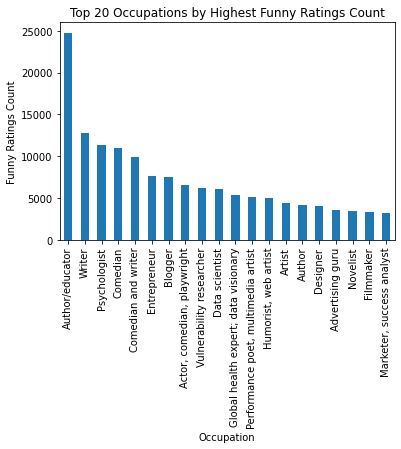

In [404]:
# group the DataFrame by occupation, sum the funny_ratings_count, and plot the top 20 occupations
df.groupby('speaker_occupation')['funny_ratings_count'].sum() \
  .sort_values(ascending=False) \
  .head(20) \
  .plot(kind='bar')

# set the plot title and labels
plt.title('Top 20 Occupations by Highest Funny Ratings Count')
plt.xlabel('Occupation')
plt.ylabel('Funny Ratings Count')

# display the plot
plt.show()

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### ii.Calculate the funny ratings rate.

In [405]:
df.funny_ratings_count / df.total_ratings_count

0       0.209323
1       0.185286
2       0.341360
3       0.015826
4       0.054254
          ...   
2545    0.005208
2546    0.132450
2547    0.007353
2548    0.108062
2549    0.000000
Length: 2550, dtype: float64

In [406]:
df['funny_ratings_rate'] = df.funny_ratings_count / df.total_ratings_count

In [407]:
df.funny_ratings_rate.describe()

count    2550.000000
mean        0.050361
std         0.087779
min         0.000000
25%         0.005922
50%         0.014981
75%         0.047736
max         0.702076
Name: funny_ratings_rate, dtype: float64

In [408]:
# Funniest 20 occupations by funny_ratings_rate
df.sort_values('funny_ratings_rate', ascending=False) \
    [['speaker_occupation', 'title']] \
    .head(20)

,speaker_occupation,title
685,"Actor, comedian, playwright","It's time for ""The Talk"""
1398,Comedian,"A Saudi, an Indian and an Iranian walk into a ..."
747,Comedian,Did you hear the one about the Iranian-American?
173,Investor,We're worried about local warming ... in your lap
2114,Comedian and writer,This is what happens when you reply to spam email
2273,Comedian and writer,The agony of trying to unsubscribe
194,Jugglers,Juggle and jest
21,"Humorist, web artist",Nerdcore comedy
675,Data scientist,"Lies, damned lies and statistics (about TEDTalks)"
568,Comedian,A one-man world summit


In [409]:
# Least funny 20 occupations by funny ratings rate
df.sort_values('funny_ratings_rate') \
    [['speaker_occupation', 'title']] \
    .head(20)

,speaker_occupation,title
2549,Game designer,How a video game might help us build better ci...
1612,Biologist,A simple solution to the coming phosphorus crisis
612,Sculptor,The painter and the pendulum
998,Penguin expert,The great penguin rescue
593,Engineer,"Making maps to fight disaster, build economies"
284,Space activist,Our next giant leap
1041,Biomedical engineer,"A prosthetic arm that ""feels"""
1618,Spinal cord researcher,The paralyzed rat that walked
2132,Computational geneticist,How we'll fight the next deadly virus
442,Sculptor,Anti-gravity sculpture


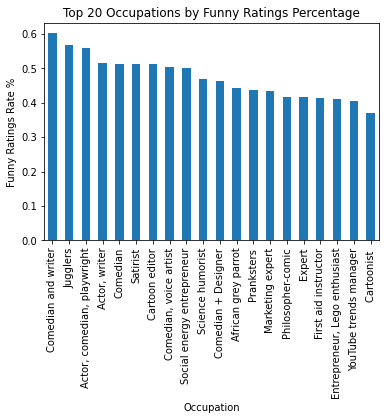

In [410]:
# group the DataFrame by occupation, sum the funny_ratings_count, and plot the top 20 occupations
df.groupby('speaker_occupation')['funny_ratings_rate'].mean() \
  .sort_values(ascending=False) \
  .head(20) \
  .plot(kind='bar')

# set the plot title and labels
plt.title('Top 20 Occupations by Funny Ratings Percentage')
plt.xlabel('Occupation')
plt.ylabel('Funny Ratings Rate %')

# display the plot
plt.show()

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

#### iii.Subplot occupations by funny ratings rate and funny ratins count.

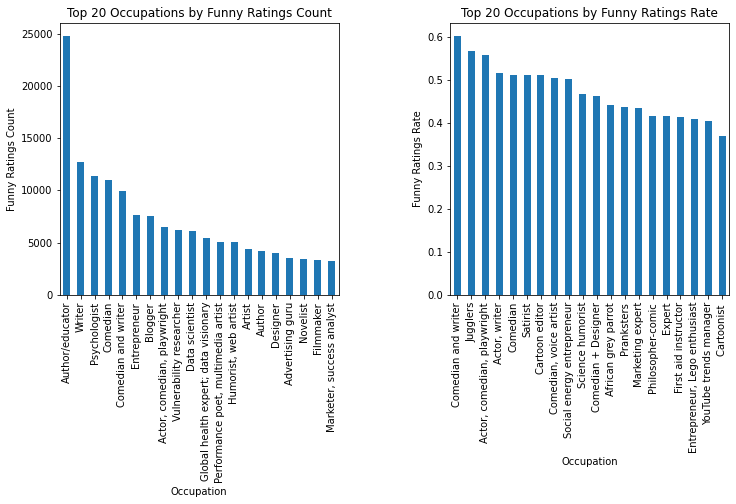

In [411]:
# create a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot the funny ratings count on the first subplot
df.groupby('speaker_occupation')['funny_ratings_count'].sum() \
  .sort_values(ascending=False) \
  .head(20) \
  .plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 20 Occupations by Funny Ratings Count')
axs[0].set_xlabel('Occupation')
axs[0].set_ylabel('Funny Ratings Count')

# plot the funny ratings rate on the second subplot
df.groupby('speaker_occupation')['funny_ratings_rate'].mean() \
  .sort_values(ascending=False) \
  .head(20) \
  .plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 20 Occupations by Funny Ratings Rate')
axs[1].set_xlabel('Occupation')
axs[1].set_ylabel('Funny Ratings Rate')

# adjust the subplot spacing and display the plot
fig.subplots_adjust(wspace=0.4)
plt.show()

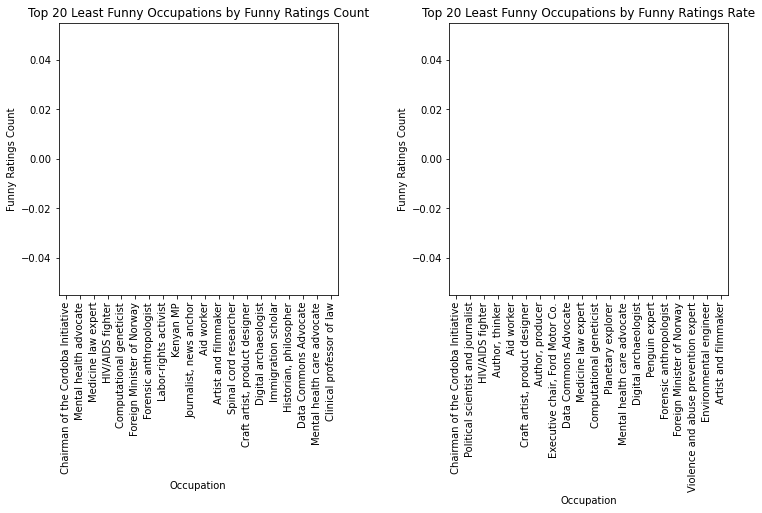

In [415]:
# create a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot the least funny occupations by count on the first subplot
df.groupby('speaker_occupation')['funny_ratings_count'] \
    .sum() \
    .sort_values() \
    .head(20) \
    .plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 20 Least Funny Occupations by Funny Ratings Count')
axs[0].set_xlabel('Occupation')
axs[0].set_ylabel('Funny Ratings Count')

# plot the least funny occupations by rate on the second subplot
df.groupby('speaker_occupation')['funny_ratings_rate'] \
    .mean() \
    .sort_values() \
    .head(20) \
    .plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 20 Least Funny Occupations by Funny Ratings Rate')
axs[1].set_xlabel('Occupation')
axs[1].set_ylabel('Funny Ratings Count')

# adjust the subplot spacing and display the plot
fig.subplots_adjust(wspace=0.4)
plt.show()

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration